## **TASK N°2**: *EMAIL SPAM DETECTION*

### The sms spam collection dataset contains one feature;

 * #### the text of the sms

### and one target label;
* #### a binary variable that can either be 'spam' if the sms text is a spam or 'ham' if the text is a normal sms

 ### The NLP task consists of building an email spam detector and classify the sms into spam or non-spam.

 ### Here are the steps taken in order to complete the task:
#### 1. load the sms spam dataset and explore it
#### 2. preprocess the data (tokenization/...)
#### 3. extract features
#### 4. train ML model and evaluate it
#### 5. choose the most accurate model from logistic regression, decision tree algorithm and KNN 
#### 6. save the model





In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Extract, transform, and load (ETL)

In [2]:
#load the data
data= "/kaggle/input/sms-spam-collection-dataset/spam.csv"
df = pd.read_csv(data, encoding='latin-1')

In [3]:
#inspect the first five lines
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#drop unnecessary columns and rename the others
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df = df.rename(columns={'v1':"label",'v2':"sms"})

In [5]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#  convert labels to binary (1 for spam, 0 for ham)
df['label'] =df['label'].map({'spam':1,'ham':0})

In [7]:
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

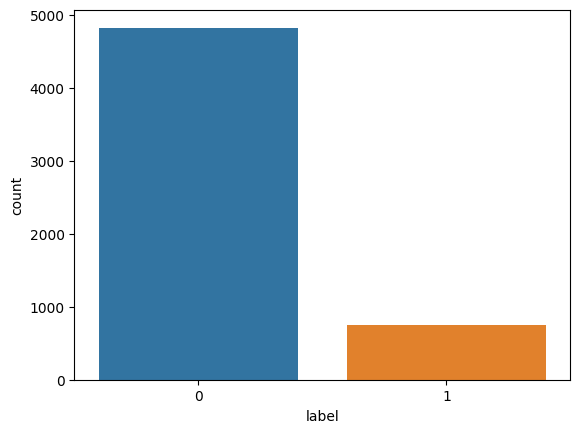

In [9]:
#visualize value counts
import seaborn as sns
sns.countplot(x=df['label'])

In [10]:
#inspect an example 
df['sms'][23]

'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'

In [11]:
#split the data (the text in the column 'sms' is the label and the label is the target )?,?,,,????
x = df['sms'].values
y=df['label'].values
print(x,y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] [0 0 1 ... 0 0 0]


In [12]:
import string 
df['sms']=df['sms'].str.lower()

In [13]:
df.head()

,label,sms
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [14]:
import re
#remove punctuation
df['sms'] = df['sms'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [15]:
df.head()

,label,sms
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [16]:
#replace numerical and special characters with a space
df['sms'] = df['sms'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [17]:
df.head()
#df['sms'][2]

,label,sms
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [18]:
#tokenization
import nltk
df["sms"]=df.apply(lambda row: nltk.word_tokenize(row["sms"]), axis=1)

In [19]:
df['sms'][2]

['free',
 'entry',
 'in',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'to',
 'to',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 'over',
 's']

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#remove stop words
from nltk.corpus import stopwords

#define the set of stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in stop_words])
    
df['sms'] = df['sms'].apply(lambda x: remove_stopwords(x))

# test - train data split (80-20 split)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# preprocessing

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#numerical value

# ml training (naive bayes)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [34]:
pipe = make_pipeline(cv, nb)

In [35]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [36]:
y_pred = pipe.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9874439461883409

In [40]:
#example to predict
email = ['this is a normal text']
pipe.predict(email)

array([0])

In [41]:
import pickle
pickle.dump(pipe,open("NB_sms.pkl",'wb'))